# Probability Assigmment

In [1]:
import seaborn as sns
import numpy as np
from scipy.stats import norm, binom, multivariate_normal
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import pandas as pd


## Problem 1a: (10 Points)

The heights of adult men in the United States are approximately normally distributed with a mean of 70 inches and a standard deviation of 3 inches. Heights of adult women are approximately normally distributed with a mean of 64.5 inches and a standard deviation of 2.5 inches.

Graph the two distributions from 0 to 100 inches using the plotting framework of your choice ( Matplotlib, Seaborn etc.)

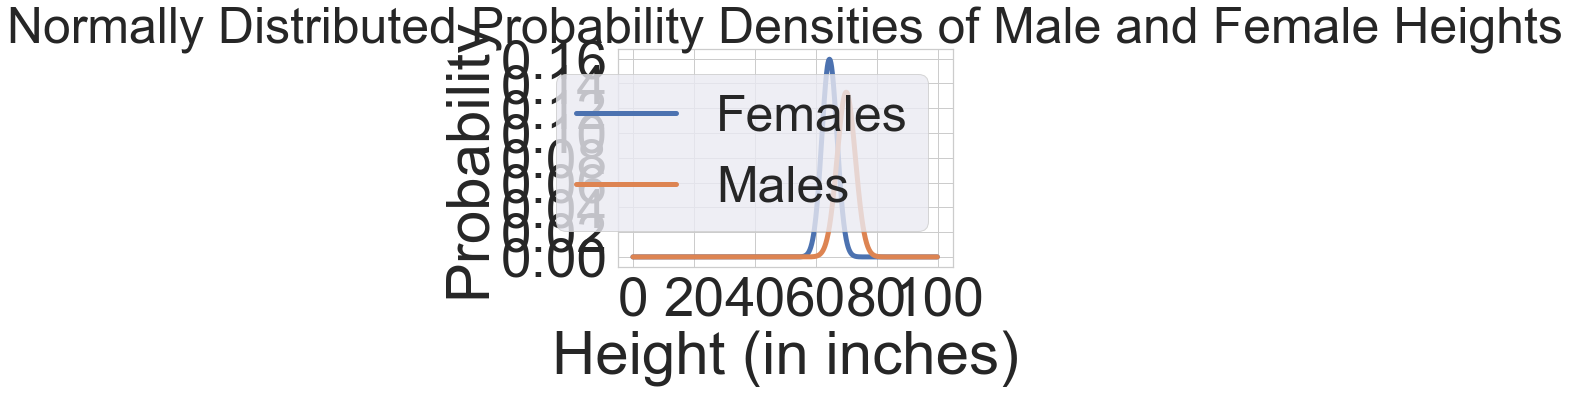

In [2]:
f_x_men = lambda x: norm.pdf(x, loc=70, scale=3)
f_x_femmes = lambda x: norm.pdf(x, loc=64.5, scale=2.5)
x_axis = list(np.arange(0, 100, 0.1))
y_men = list(map(f_x_men, x_axis))
y_femme = list(map(f_x_femmes, x_axis))
sns.set(font_scale = 4)
sns.set_theme(style="whitegrid", font_scale=5)
g = sns.lineplot(x=x_axis,y=y_femme, linewidth = 5)
g = sns.lineplot(x=x_axis, y=y_men, linewidth = 5)
g = sns.set(rc = {'figure.figsize':(50,30)})
g = plt.xlabel("Height (in inches)")
g = plt.ylabel("Probability")
g = plt.title("Normally Distributed Probability Densities of Male and Female Heights", fontdict={"size":"50"})
plt.legend(labels=["Females","Males"], fontsize=50)
plt.show()

## Problem 1b: (10 Points)

What is the probability that a female is between the heights of 65 inches and 70 inches? What is the probability that a female is between the heights of 65 inches and 70 inches given that they are at least 60 inches tall ( You can use 100 as the upper limit of the distribution )?

(Hint: This is a probability assignment, not a calculus assignment. You do not need to calculate any integrals, just show the steps that you would take and the final result)

---

Given a random variable $X$ (denoting women's heights) $ \sim N(65.5, 2.5)$, the probability that a female's height is between 65 and 70 inches could be expressed as:

$$P(65 > X > 70) = F_X(70) - F_X(65) = \int_{-∞}^{70} f_X(t)dt - \int_{-∞}^{65} f_X(t)dt$$

Given the same random variable X, the probability that a female's height is between 65 and 70 inches given that they are at least 60 inches tall could be expressed as:

$$P(65 > X > 70| X > 60) = \frac{P(65 > X > 70\cap X > 60)}{P(X>60)} = \frac{P(65 > X > 70)}{P(X>60)} = \frac{\int_{65}^{70} f_X(x)dx}{\int_{60}^{100} f_X(x)dx}

## Problem 1c: (20 Points)

Lets say you conduct an experiment with a 100 trials where you measure a random man's height. Lets say the measurement that you take is always rounded down to an integer 

( ie. both a person with a height of 75.2 inches and a person of height 75.8 inches would be recorded as 75 inches thus making the distribution a discrete distribution instead of continuous). 

What do you expect the count of men with a height of 70 inches to be? What type of distribution do you expect it to be?

( You do not need to answer these questions, it is simply something to think about to aid you with the next part )

Calculate the probability distribution function of the "counts" of people out of 100 with a height of 70 inches. 

( Hint: You will have to find the categorical probability that a man is of height 70 )

Simulate the experiment 1000 times to show the relationship on a plot. What is the relationship between number of times the experiment is run and how close it is to the true distribution

( Hint: numpy has many functions that can allow you to simulate distribution functions )

---

The probability distribution function of the counts of people out of 100 with a height of 70 inches, denoted $Y$, could be expressed as a binomial distribution, where n is the number of people and $p=f_X(70)=.133$ is the probability of anyone person having the height of 70 inches; i.e. $Y \sim Bin(100, .133)$

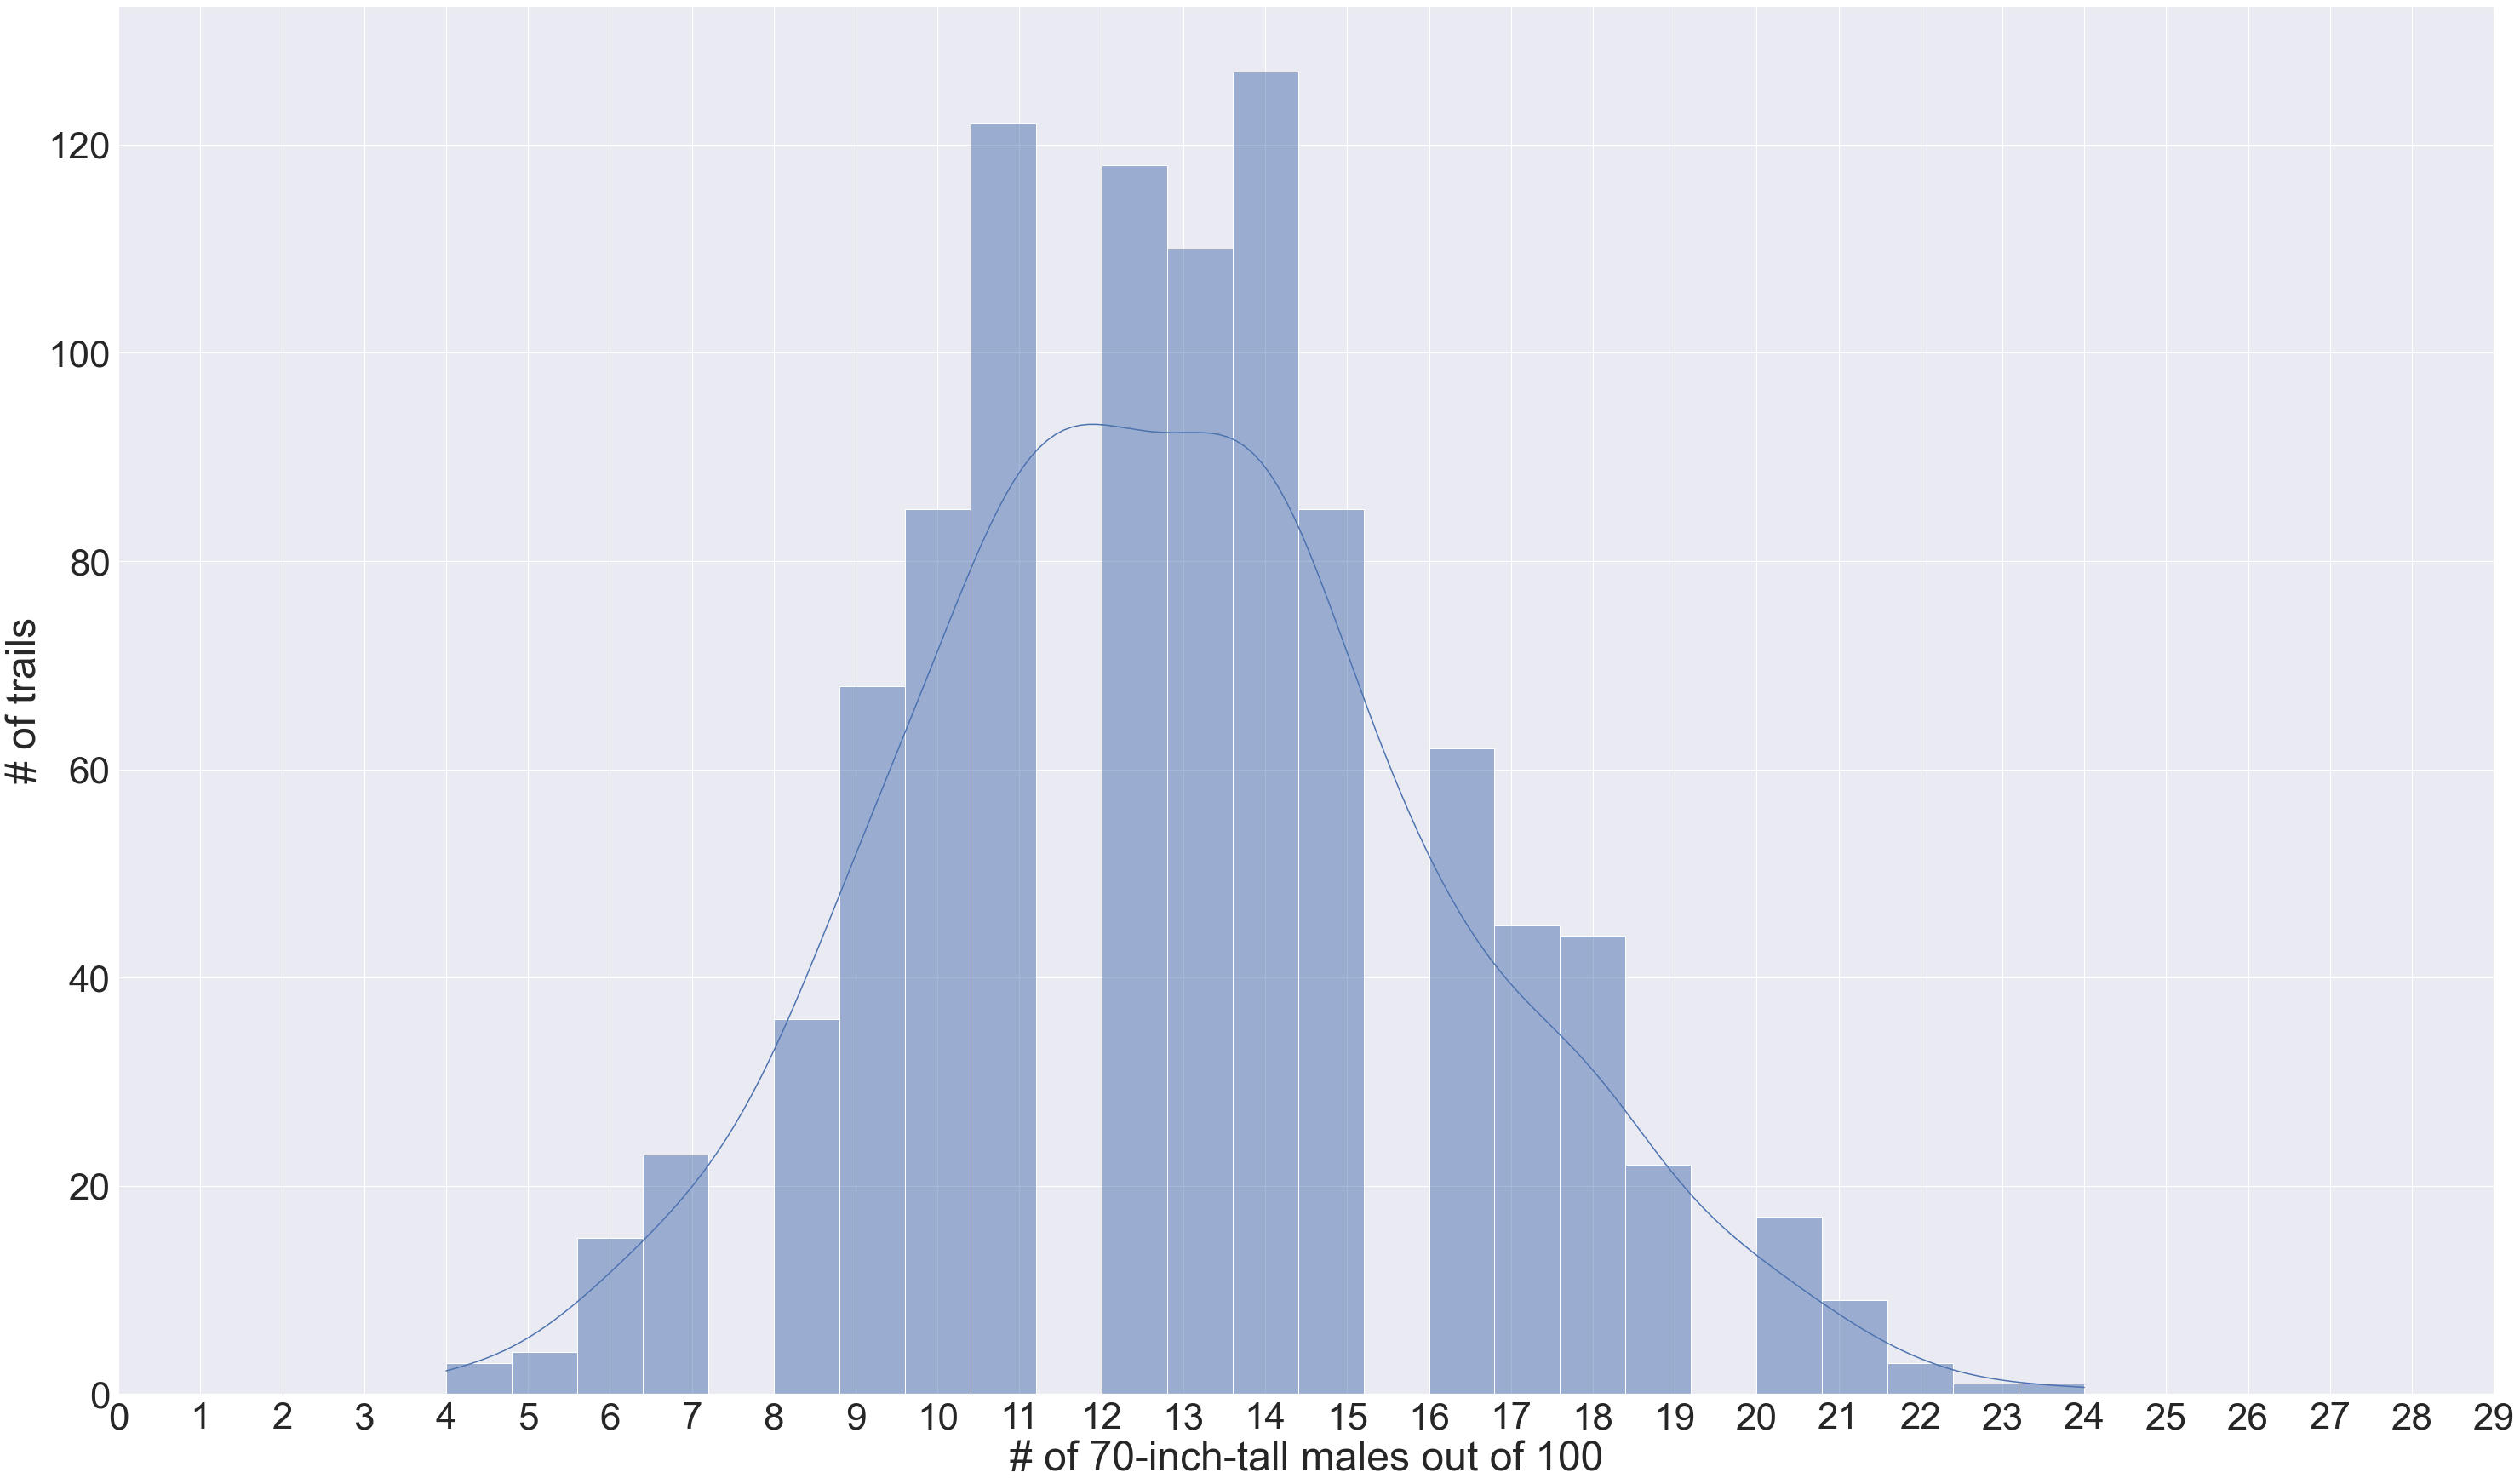

In [3]:
x_axis=list(range(0,30,1))
trials=np.random.binomial(100, .13, 1000)
q=sns.set(font_scale = 4)
q=sns.histplot(data=trials,kde=True)
q=plt.xlabel("# of 70-inch-tall males out of 100")
q=plt.ylabel("# of trails")
q=plt.xticks(x_axis)
plt.show()

In the a histogram of the number of height of 70 inches simulation 

## Problem 2a: (15 Points)

* Given the circuit below, the probability that any switch $S$ is closed (current passes through ) is $p$? What is the probability that there is a signal at the output? Give your answer in terms of $p$

![probability-circuit](https://github.com/pantelis/aiml-common/blob/master/assignments/probability/probability-assignment-2/probability-circuit.png?raw=1)

---

Let the event $A$ be that there is a signal in the output, thus $P(A) = P(S_3 | S_1 \cap S_2) \cup (S_5 \cap S_6 | S_4))$
which by the inclusion-exclusion principle of probability means: $$P(S_3 | S_1 \cap S_2) \cup P(S_5 \cap S_6 | S_4) = P(S_3|S_1 \cap S_2) + P(S_5 \cap S_6 | S_4) - P((S_3|S_1 \cap S_2) \cap (S_5 \cap S_6 | S_4))$$

Given that $P(S_i) = p$, for any given switch in the circuit, expanding each term, we have, by definition of conditional probability: $$P(S_3 | S_1 \cap S_2) = \frac{P(S_1 \cap S_2) \cap P(S_3)}{P(S_1 \cap S_2)} = \frac{P(S_1)P(S_2)P(S_3)}{P(S_1)P(S_2)} = \frac{p^3}{p^2}$$

and,

$$P(S_5 \cap S_6 | S_4) = \frac{P(S_4) \cap P(S_5 \cap S_6)}{P(S_4)} = \frac{P(S_4)P(S_5)P(S_6)}{P(S_4)} = \frac{p^3}{p}$$

and since the disjuncts of the last term are independent we have,

$$P((S_3|S_1 \cap S_2) \cap (S_5 \cap S_6 | S_4)) = P(S_3 | S_1 \cap S_2) P(S_5 \cap S_6 | S_4) = (\frac{p^3}{p^2})(\frac{p^3}{p}) = \frac{p^6}{p^3}

which altogether yields, as a final probability: $$\frac{p^3}{p^2} + \frac{p^3}{p} - \frac{p^6}{p^3} = p + p^2 - p^3 = p(1 + p - p^2)$$

## Problem 2b: (15 Points)

Given the same circuit above, if a signal is observed at the end, what is the probability that $S_3$ is open ( no current going through ) . Give your answer in terms of $p$. 

---

Given the same circuit, the probability that circuit $S_3$ is open (denoted $S_3^\prime$ having probability $q=1-p$), given that the output signal is observed (i.e. $P(A)$), could be expressed as:

$$P(S^\prime_3 | A) = \frac{P(A \cap S_3^\prime)}{P(A)}

the only way that A and $S_3^\prime$ can occur together is if the current comes from the other side of the circuit, i.e. $S_4 \cup S_5 \cup S_6$, which occurs with probability $p^3$

were have calculated $P(A)$ in problem 2A, so we substitute, which yields: $$P(S^\prime_3 | A) = \frac{p^3}{(p(1 + p - p^2)} = \frac{p^2}{1 + p - p^2}$$

## Problem 3a (20 points)


It follows that those with a larger height will be generally heavier than those with a smaller height. This is just a broad generalization and does not always apply. [Here](https://www.kaggle.com/mustafaali96/weight-height/version/1) is a link to a data set that contains anonymous entries on peoples' gender, height and weight. Download this dataset ( It is pretty small don't worry ). You might need to make a Kaggle account. Kaggle is an online community of data scientists and has a large collection of open source datasets for many different purposes. 

Familiarize yourself with the package pandas, as you can use it to easily unpack the csv into manipulatable datatypes. If you are using [colab](https://colab.research.google.com/), which you most likely are, ensure that you have logged in with the university Google account. 

Using the data find two values for covariance between height and weight. There should be one value for male and female. 

(Hint: Make sure to store all intermediate values like averages and counts as they might be useful for the extra credit)


In [4]:
# Read flat-file
hw_df=pd.read_csv("./data/weight-height.csv")

In [5]:
# Split dataframes by Gender
males_hw=hw_df[hw_df.Gender == "Male"]
femmes_hw=hw_df[hw_df.Gender == "Female"]

In [6]:
# Store # of observations
n_males = len(males_hw)
n_femmes = len(femmes_hw)

In [7]:
# Calculate means
males_height_x_bar=males_hw.Height.mean()
males_weight_x_bar=males_hw.Weight.mean()
femmes_height_x_bar=femmes_hw.Height.mean()
femmes_weight_x_bar=femmes_hw.Weight.mean()

In [8]:
# Calculate deviations from respective means
males_height_deviations=males_hw.Height.apply(lambda x: x - males_height_x_bar)
males_weight_deviations=males_hw.Weight.apply(lambda x: x - males_weight_x_bar)
femmes_height_deviations=femmes_hw.Height.apply(lambda x: x - femmes_height_x_bar)
femmes_weight_deviations=femmes_hw.Weight.apply(lambda x: x - femmes_weight_x_bar)

In [9]:
# Calculate Covariances
cov_males = (males_height_deviations * males_weight_deviations).sum()/n_males
cov_femmes=(femmes_height_deviations * femmes_weight_deviations).sum()/n_femmes
print(f"Men's Height/Weight Covariance: {cov_males.round(2)}")
print(f"Female's Height/Weight Covariance: {cov_femmes.round(2)}")

Men's Height/Weight Covariance: 48.87
Female's Height/Weight Covariance: 43.57


## Problem 3b: (10 points)

Find the correlation between height and weight for Males and Females

In [10]:
femmes_sum_cross_dev=(femmes_height_deviations * femmes_weight_deviations).sum()
femmes_hw_corr = femmes_sum_cross_dev/np.sqrt((femmes_height_deviations.apply(lambda x: x*x).sum() * femmes_weight_deviations.apply(lambda x: x*x).sum()))
males_sum_cross_dev=(males_height_deviations * males_weight_deviations).sum()
males_hw_corr = males_sum_cross_dev/np.sqrt((males_height_deviations.apply(lambda x: x*x).sum() * males_weight_deviations.apply(lambda x: x*x).sum()))
print(f"Males Height/Weight Correlation: {males_hw_corr.round(5)}")
print(f"Females Height/Weight Correlation: {femmes_hw_corr.round(5)}")

Males Height/Weight Correlation: 0.86298
Females Height/Weight Correlation: 0.84961


## Extra credit: (5 points)

Using matplotlib's or seaborn's 3D graphing functionality, create a wireframe graph of the multivariate probability distribution of heights and weights for either male or female ( You don't have to do both ). Use the data and calculated values from problem 3 to solve this problem.

( Hint: You can assume both distributions are normal. Use [this](https://en.wikipedia.org/wiki/Multivariate_normal_distribution) link to help in understanding )


In [11]:

x = femmes_hw.Height
y = femmes_hw.Weight
X = np.linspace(min(x),max(x),5000)
Y = np.linspace(min(y),max(y),5000)
X, Y = np.meshgrid(X, Y)
pos = np.dstack((X, Y))
rv=multivariate_normal(mean=[femmes_height_x_bar, femmes_weight_x_bar], cov=femmes_hw.cov())

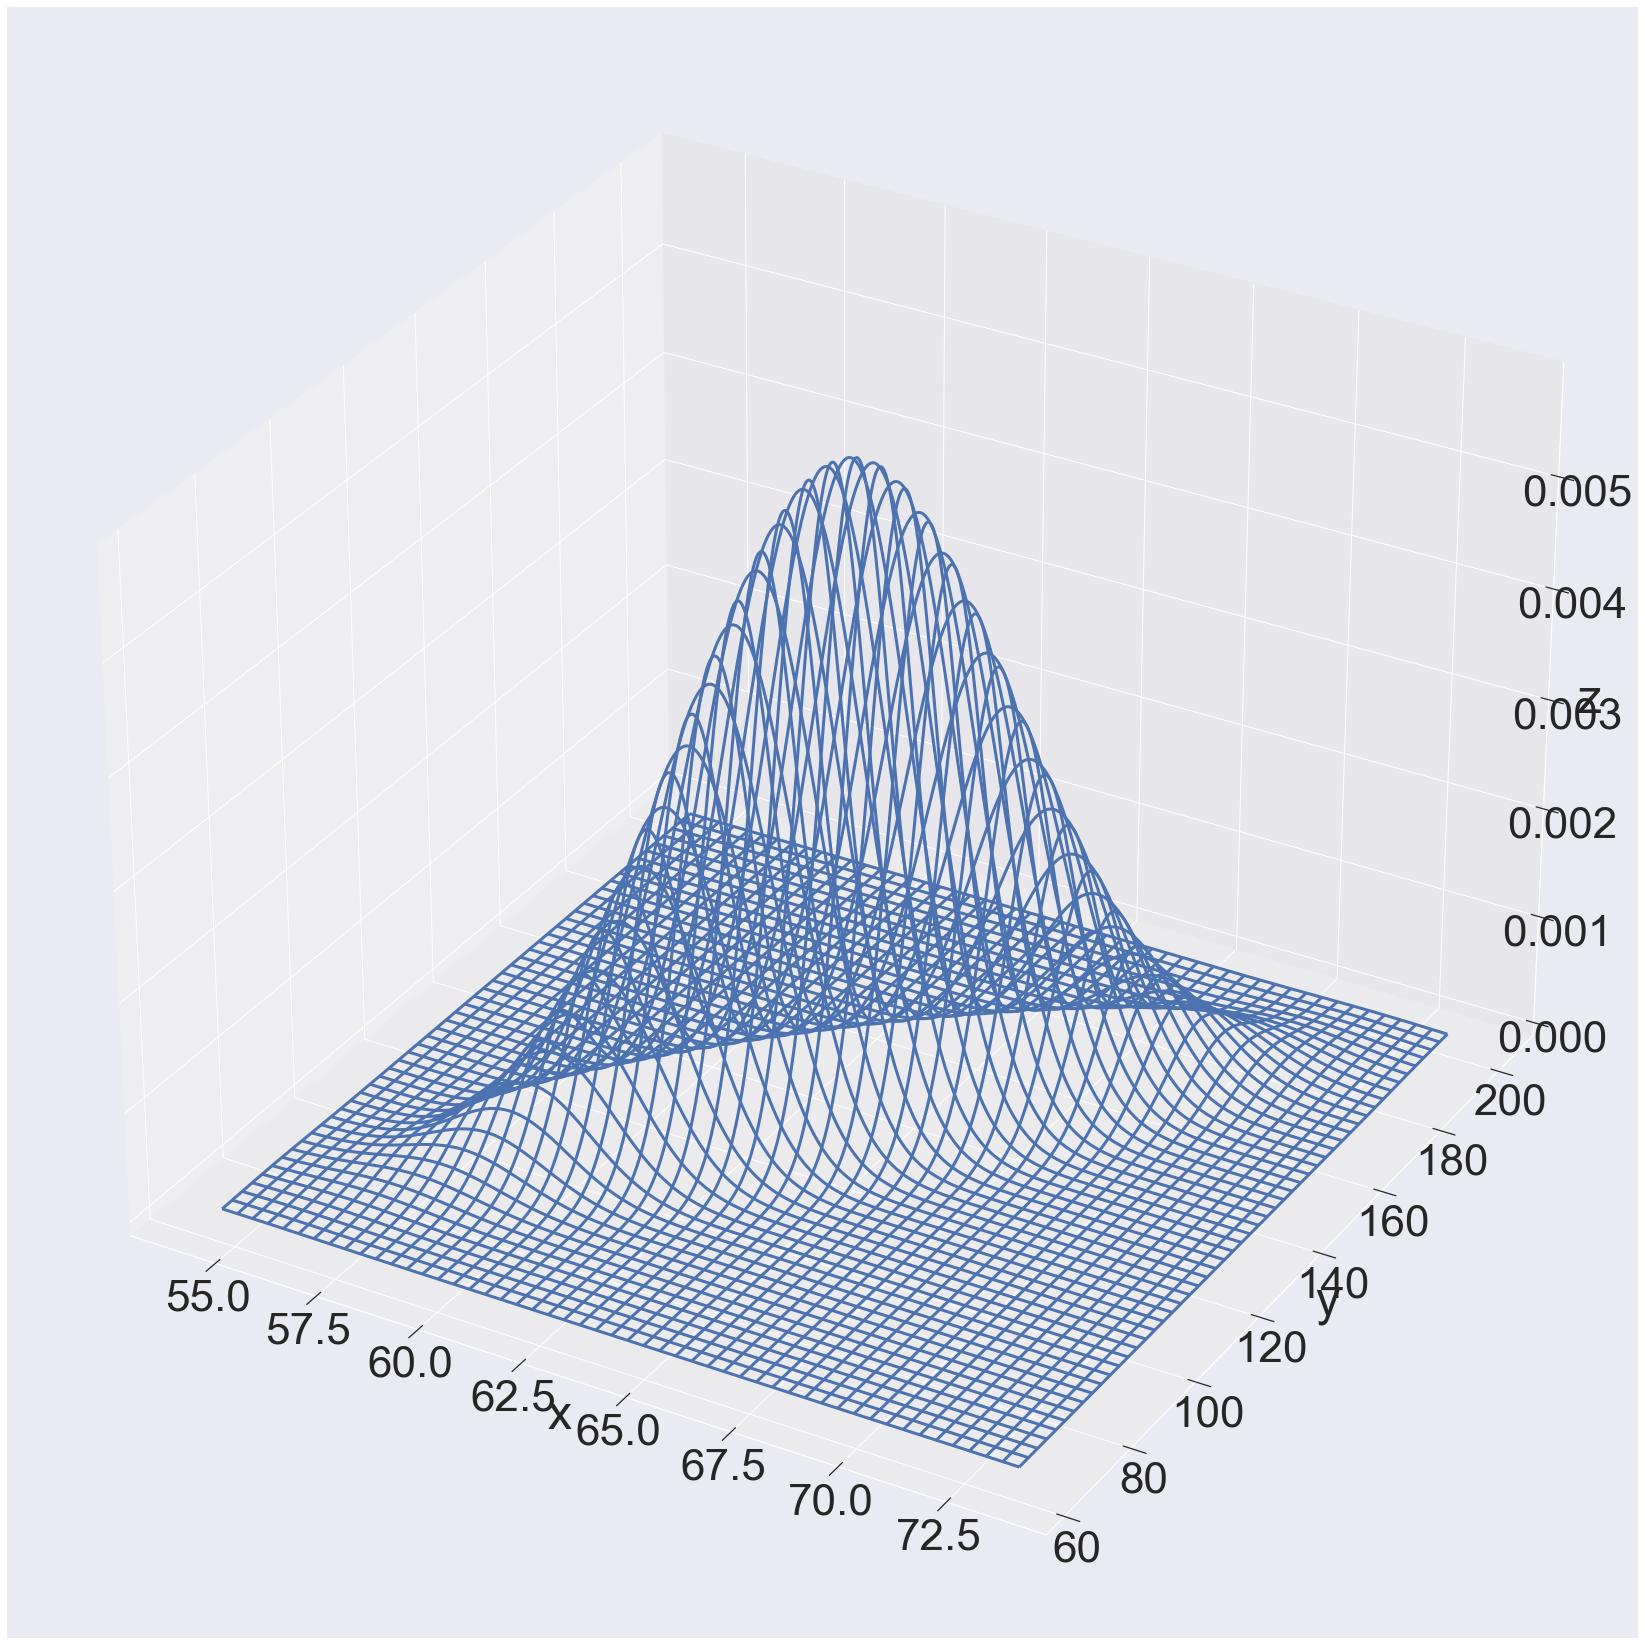

In [13]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_wireframe(X, Y, rv.pdf(pos),3, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()